In [48]:
import sys
import tensorflow as tf
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import itertools
import shutil as sh
from collections import defaultdict

tf.logging.set_verbosity(tf.logging.ERROR)

In [49]:
train_data = pd.read_csv('train.csv').drop(columns='PassengerId')
test_data = pd.read_csv('test.csv').drop(columns='PassengerId')

In [56]:
train_data['Survived'].dtype

dtype('int64')

In [61]:
train_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,23,4,22.0,1,0,9,7.2500,3,1
1,1,1,51,6,38.0,1,0,8,71.2833,3,1
2,1,3,22,6,26.0,0,0,16,7.9250,3,1
3,1,1,44,6,35.0,1,0,6,53.1000,4,1
4,0,3,24,4,35.0,0,0,6,8.0500,3,1
5,0,3,16,4,0.1,0,0,6,8.4583,3,1
6,0,1,23,4,54.0,0,0,5,51.8625,3,1
7,0,3,30,4,2.0,3,1,6,21.0750,3,1
8,1,3,49,6,27.0,0,2,6,11.1333,3,1
9,1,2,35,6,14.0,1,0,6,30.0708,3,1


In [62]:
test_data.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,16,4,34.5,0,0,6,7.8292,3,1
1,3,32,6,47.0,1,0,6,7.0000,3,1
2,2,25,4,62.0,0,0,6,9.6875,3,1
3,3,16,4,27.0,0,0,6,8.6625,3,1
4,3,44,6,22.0,1,1,7,12.2875,3,1
5,3,26,4,14.0,0,0,4,9.2250,3,1
6,3,20,6,30.0,0,0,6,7.6292,3,1
7,2,28,4,26.0,1,1,6,29.0000,3,1
8,3,41,6,18.0,0,0,4,7.2292,3,1
9,3,23,4,21.0,2,0,9,24.1500,3,1


In [57]:
for col in train_data:
    if not np.issubdtype(train_data[col].dtype, np.number):
        train_data[col] = train_data[col].apply(lambda x: len(str(x)))

In [59]:
for col in test_data:
    if not np.issubdtype(test_data[col].dtype, np.number):
        test_data[col] = test_data[col].apply(lambda x: len(str(x)))

In [60]:
train_data.fillna(0.1, inplace=True)
test_data.fillna(0.1, inplace=True)

In [4]:
train_data['Married_female'] = train_data['Name'].apply(lambda x: 1 if x.find('Mrs') != -1 else 0)
test_data['Married_female'] = test_data['Name'].apply(lambda x: 1 if x.find('Mrs') != -1 else 0)

In [5]:
for i in range(len(train_data)):
    name = train_data['Name'][i]
    if name[-1:].find('J') != -1:
        print(name)

McCarthy, Mr. Timothy J
Fynney, Mr. Joseph J
Davies, Mr. Alfred J
Knight, Mr. Robert J
Lesurer, Mr. Gustave J
Moran, Mr. Daniel J
Kilgannon, Mr. Thomas J


In [6]:
for name in train_data['Name']:
    if name.find('Jr') >= 0:
        print(name)

Hood, Mr. Ambrose Jr
Johnson, Mr. William Cahoone Jr
Sage, Mr. George John Jr
Elias, Mr. Joseph Jr
Davies, Master. John Morgan Jr
Thayer, Mr. John Borland Jr
Kimball, Mr. Edwin Nelson Jr
Andrews, Mr. Thomas Jr
Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
Sutehall, Mr. Henry Jr


In [7]:
married_males = []

for text in train_data['Name']:
    if text.find('Mrs.') < 0:
        continue
    words_list = text.split(', Mrs.')
    surname = words_list[0]
    second_word = words_list[1]
    words_list = second_word.split('(')
    name = words_list[0]
    if name == ' ':
        continue
    name = name.strip()
    surname = surname.strip()
    married_males.append(surname + ', Mr. ' + name)

In [8]:
married_males_test = []

for text in test_data['Name']:
    if text.find('Mrs.') < 0:
        continue
    words_list = text.split(', Mrs.')
    surname = words_list[0]
    second_word = words_list[1]
    words_list = second_word.split('(')
    name = words_list[0]
    if name == ' ':
        continue
    name = name.strip()
    surname = surname.strip()
    married_males_test.append(surname + ', Mr. ' + name)

In [9]:
train_data['Married_male'] = train_data['Name'].apply(lambda x: 1 if x in married_males else 0)
test_data['Married_male'] = test_data['Name'].apply(lambda x: 1 if x in married_males else 0)

In [10]:
train_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Married_female,Married_male
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,0
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,0


In [11]:
train_data['Young'] = train_data.apply(
    lambda x: 1 if x.Name[-1:] == 'J' or x.Name.find('Jr') >= 0 or 12 < x.Age <= 25 else 0, axis=1)

test_data['Young'] = test_data.apply(
    lambda x: 1 if x.Name[-1:] == 'J' or x.Name.find('Jr') >= 0 or 12 < x.Age <= 25 else 0, axis=1)

In [12]:
train_data['Age'] = train_data.apply(
    lambda x: 25 if np.isnan(x.Age) and x.Young == 1 else 40 if np.isnan(x.Age) else x.Age, axis=1)

test_data['Age'] = test_data.apply(
    lambda x: 25 if np.isnan(x.Age) and x.Young == 1 else 40 if np.isnan(x.Age) else x.Age, axis=1)

In [13]:
# LIMITS FOR AGE
LOW = 7
HIGH = 65

dumb = train_data.copy()

dumb['Age'] = dumb.apply(lambda x: 'LOW' if x.Age < LOW else float(x.Age), axis=1)
dumb['Age'] = dumb.apply(lambda x: 'MID' if isinstance(x.Age, float) and HIGH > x.Age >= LOW else x.Age, axis=1)
dumb['Age'] = dumb.apply(lambda x: 'HIGH' if isinstance(x.Age, float) and x.Age >= HIGH else x.Age, axis=1)

dumb.groupby(by='Age')['Survived'].agg([np.ma.count, np.median, np.mean]).sort_values(by='mean')

,count,median,mean
Age,,,
HIGH,11,0,0.090909
MID,833,0,0.369748
LOW,47,1,0.702128


In [14]:
train_data['Age'] = train_data.apply(lambda x: 'LOW' if x.Age < LOW else float(x.Age), axis=1)
train_data['Age'] = train_data.apply(lambda x: 'MID' if isinstance(x.Age, float) and HIGH > x.Age >= LOW else x.Age, axis=1)
train_data['Age'] = train_data.apply(lambda x: 'HIGH' if isinstance(x.Age, float) and x.Age >= HIGH else x.Age, axis=1)

test_data['Age'] = test_data.apply(lambda x: 'LOW' if x.Age < LOW else float(x.Age), axis=1)
test_data['Age'] = test_data.apply(lambda x: 'MID' if isinstance(x.Age, float) and HIGH > x.Age >= LOW else x.Age, axis=1)
test_data['Age'] = test_data.apply(lambda x: 'HIGH' if isinstance(x.Age, float) and x.Age >= HIGH else x.Age, axis=1)

In [15]:
dummy = pd.get_dummies(train_data['Age'], prefix='Age', prefix_sep='_')

ages = list(dummy)

train_data[ages] = dummy[ages]

In [16]:
dummy = pd.get_dummies(test_data['Age'], prefix='Age', prefix_sep='_')

ages = list(dummy)

test_data[ages] = dummy[ages]

In [17]:
train_data.drop(columns='Age', inplace=True)
test_data.drop(columns='Age', inplace=True)

In [18]:
for col in train_data:
    if train_data[col].isna().any():
        print(col)

Cabin
Embarked


In [19]:
for col in test_data:
    if test_data[col].isna().any():
        print(col)

Fare
Cabin


In [20]:
test_data['Fare'].fillna(0.0, inplace=True)

In [21]:
mapping = {'female':1, 'male':0}

train_data['Sex'].replace(to_replace=mapping, inplace=True)
test_data['Sex'].replace(to_replace=mapping, inplace=True)

In [22]:
train_data['Ticket'] = train_data.apply(lambda x: 'Reg' if x.Ticket.isnumeric() else x.Ticket, axis=1)

test_data['Ticket'] = test_data.apply(lambda x: 'Reg' if x.Ticket.isnumeric() else x.Ticket, axis=1)

In [23]:
train_data['Ticket'] = train_data.apply(lambda x: x.Ticket[:1], axis=1)

test_data['Ticket'] = test_data.apply(lambda x: x.Ticket[:1], axis=1)

In [24]:
val, uniq = train_data['Ticket'].factorize()

uniq = list(uniq)
uniq.sort()
print(*uniq, sep='\n')

A
C
F
L
P
R
S
W


In [25]:
val, uniq = test_data['Ticket'].factorize()

uniq = list(uniq)
uniq.sort()
print(*uniq, sep='\n')

A
C
F
L
P
R
S
W


In [26]:
# ...GET MAPPINGS

mapping_dict = {}
 
uniq_dict = defaultdict(list)

# create dictionary {class: list of prices}
for i in range(len(train_data)):
    uniq_dict[train_data['Ticket'][i]].append(train_data['Survived'][i])

# find mean price value for each class in dictionary
for item in uniq_dict:
    uniq_dict[item] = sum(uniq_dict[item]) / len(uniq_dict[item])

# convert dictionary to list of tuples [(class, mean_price), ...]
dlst = uniq_dict.items()
lst = [*dlst]

#sort list of tuples by mean_price
lst.sort(key=lambda x: x[1])

# convert classes to float coefficients using (mean_price_for_class / max_mean_value)
classes, mean_prices = zip(*lst)
max_mean_price = max(mean_prices)
numeric_class_list = []
for i in range(len(classes)):
    numeric_class_list.append(round(mean_prices[i] / max_mean_price, 3))

# create mapping {class: numeric_class}
mapping = dict(zip(list(classes), numeric_class_list))

mapping

{'A': 0.107,
 'C': 0.527,
 'F': 0.884,
 'L': 0.387,
 'P': 1.0,
 'R': 0.595,
 'S': 0.5,
 'W': 0.238}

In [27]:
train_data['Ticket'] = train_data.apply(lambda x: 'SCR' if x.Ticket in 'SCR' else x.Ticket, axis=1)

test_data['Ticket'] = test_data.apply(lambda x: 'SCR' if x.Ticket in 'SCR' else x.Ticket, axis=1)

In [28]:
dummy = pd.get_dummies(train_data['Ticket'], prefix='Ticket', prefix_sep='_')

tickets = list(dummy)

train_data[tickets] = dummy[tickets]

In [29]:
dummy = pd.get_dummies(test_data['Ticket'], prefix='Ticket', prefix_sep='_')

tickets = list(dummy)

test_data[tickets] = dummy[tickets]

In [30]:
train_data.drop(columns=['Name', 'Ticket'], inplace=True)
test_data.drop(columns=['Name', 'Ticket'], inplace=True)

In [31]:
# ...GET MAPPINGS

mapping_dict = {}
 
uniq_dict = defaultdict(list)

# create dictionary {class: list of prices}
for i in range(len(train_data)):
    uniq_dict[train_data['Embarked'][i]].append(train_data['Survived'][i])

# find mean price value for each class in dictionary
for item in uniq_dict:
    uniq_dict[item] = sum(uniq_dict[item]) / len(uniq_dict[item])

# convert dictionary to list of tuples [(class, mean_price), ...]
dlst = uniq_dict.items()
lst = [*dlst]

#sort list of tuples by mean_price
lst.sort(key=lambda x: x[1])

# convert classes to float coefficients using (mean_price_for_class / max_mean_value)
classes, mean_prices = zip(*lst)
max_mean_price = max(mean_prices)
numeric_class_list = []
for i in range(len(classes)):
    numeric_class_list.append(round(mean_prices[i] / max_mean_price, 3))

# create mapping {class: numeric_class}
mapping = dict(zip(list(classes), numeric_class_list))

mapping

{'C': 0.554, 'Q': 0.39, 'S': 0.337, nan: 1.0}

In [32]:
train_data.dropna(axis=0, subset=['Embarked'], inplace=True)

In [33]:
train_data.reset_index(drop=True, inplace=True)

In [34]:
dummy = pd.get_dummies(train_data['Embarked'], prefix='Embark', prefix_sep='_')

embark = list(dummy)

train_data[embark] = dummy[embark]

In [35]:
dummy = pd.get_dummies(test_data['Embarked'], prefix='Embark', prefix_sep='_')

embark = list(dummy)

test_data[embark] = dummy[embark]

In [36]:
train_data.drop(columns='Embarked', inplace=True)

test_data.drop(columns='Embarked', inplace=True)

In [37]:
train_data['Cabin'].fillna('N', inplace=True)

test_data['Cabin'].fillna('N', inplace=True)

In [38]:
train_data['Cabin'] = train_data.apply(lambda x: x.Cabin[:1], axis=1)

test_data['Cabin'] = test_data.apply(lambda x: x.Cabin[:1], axis=1)

In [39]:
# ...GET MAPPINGS

mapping_dict = {}
 
uniq_dict = defaultdict(list)

# create dictionary {class: list of prices}
for i in range(len(train_data)):
    uniq_dict[train_data['Cabin'][i]].append(train_data['Survived'][i])

# find mean price value for each class in dictionary
for item in uniq_dict:
    uniq_dict[item] = sum(uniq_dict[item]) / len(uniq_dict[item])

# convert dictionary to list of tuples [(class, mean_price), ...]
dlst = uniq_dict.items()
lst = [*dlst]

#sort list of tuples by mean_price
lst.sort(key=lambda x: x[1])

# convert classes to float coefficients using (mean_price_for_class / max_mean_value)
classes, mean_prices = zip(*lst)
max_mean_price = max(mean_prices)
numeric_class_list = []
for i in range(len(classes)):
    numeric_class_list.append(round(mean_prices[i] / max_mean_price, 3))

# create mapping {class: numeric_class}
mapping = dict(zip(list(classes), numeric_class_list))

mapping

{'A': 0.616,
 'B': 0.968,
 'C': 0.783,
 'D': 1.0,
 'E': 0.99,
 'F': 0.812,
 'G': 0.66,
 'N': 0.396,
 'T': 0.0}

In [40]:
train_data['Cabin'] = train_data.apply(lambda x: 'EBD' if x.Cabin in 'EBD' else x.Cabin, axis=1)

test_data['Cabin'] = test_data.apply(lambda x: 'EBD' if x.Cabin in 'EBD' else x.Cabin, axis=1)

In [41]:
train_data['Cabin'] = train_data.apply(lambda x: 'AG' if x.Cabin in 'AG' else x.Cabin, axis=1)

test_data['Cabin'] = test_data.apply(lambda x: 'AG' if x.Cabin in 'AG' else x.Cabin, axis=1)

In [42]:
train_data['Cabin'] = train_data.apply(lambda x: 'CF' if x.Cabin in 'CF' else x.Cabin, axis=1)

test_data['Cabin'] = test_data.apply(lambda x: 'CF' if x.Cabin in 'CF' else x.Cabin, axis=1)

In [43]:
train_data['Cabin'] = train_data.apply(lambda x: 'N' if x.Cabin in 'TN' else x.Cabin, axis=1)

test_data['Cabin'] = test_data.apply(lambda x: 'N' if x.Cabin in 'TN' else x.Cabin, axis=1)

In [44]:
train_data.groupby(by='Cabin')['Survived'].agg([np.ma.count, np.median, np.mean]).sort_values(by='mean')

,count,median,mean
Cabin,,,
N,688,0,0.299419
AG,19,0,0.473684
CF,72,1,0.597222
EBD,110,1,0.745455


In [45]:
dummy = pd.get_dummies(train_data['Cabin'], prefix='Cabin', prefix_sep='_')

cabins = list(dummy)

train_data[cabins] = dummy[cabins]

In [46]:
dummy = pd.get_dummies(test_data['Cabin'], prefix='Cabin', prefix_sep='_')

cabins = list(dummy)

test_data[cabins] = dummy[cabins]

In [47]:
train_data.drop(columns='Cabin', inplace=True)

test_data.drop(columns='Cabin', inplace=True)

In [48]:
# LIMITS FOR PRICE
LOW = 7
MID = 15
HIGH = 80

dumb = train_data.copy()

dumb['Fare'] = dumb.apply(lambda x: 'LOW' if x.Fare < LOW else x.Fare, axis=1)
dumb['Fare'] = dumb.apply(lambda x: 'MID_LOW' if isinstance(x.Fare, np.number) and x.Fare >= LOW and x.Fare < MID else x.Fare, axis=1)
dumb['Fare'] = dumb.apply(lambda x: 'MID_HIGH' if isinstance(x.Fare, np.number) and x.Fare >= MID and x.Fare < HIGH else x.Fare, axis=1)
dumb['Fare'] = dumb.apply(lambda x: 'HIGH' if isinstance(x.Fare, np.number) and x.Fare >= HIGH else x.Fare, axis=1)

dumb.groupby(by='Fare')['Survived'].agg([np.ma.count, np.median, np.mean]).sort_values(by='mean')

,count,median,mean
Fare,,,
LOW,28,0,0.071429
MID_LOW,429,0,0.261072
MID_HIGH,358,0,0.472067
HIGH,74,1,0.770270


In [49]:
LOW = 7
MID = 15
HIGH = 80

train_data['Fare'] = train_data.apply(lambda x: 'LOW' if x.Fare < LOW else x.Fare, axis=1)
train_data['Fare'] = train_data.apply(lambda x: 'MID_LOW' if isinstance(x.Fare, np.number) and x.Fare >= LOW and x.Fare < MID else x.Fare, axis=1)
train_data['Fare'] = train_data.apply(lambda x: 'MID_HIGH' if isinstance(x.Fare, np.number) and x.Fare >= MID and x.Fare < HIGH else x.Fare, axis=1)
train_data['Fare'] = train_data.apply(lambda x: 'HIGH' if isinstance(x.Fare, np.number) and x.Fare >= HIGH else x.Fare, axis=1)

test_data['Fare'] = test_data.apply(lambda x: 'LOW' if x.Fare < LOW else x.Fare, axis=1)
test_data['Fare'] = test_data.apply(lambda x: 'MID_LOW' if isinstance(x.Fare, np.number) and x.Fare >= LOW and x.Fare < MID else x.Fare, axis=1)
test_data['Fare'] = test_data.apply(lambda x: 'MID_HIGH' if isinstance(x.Fare, np.number) and x.Fare >= MID and x.Fare < HIGH else x.Fare, axis=1)
test_data['Fare'] = test_data.apply(lambda x: 'HIGH' if isinstance(x.Fare, np.number) and x.Fare >= HIGH else x.Fare, axis=1)

In [50]:
dummy = pd.get_dummies(train_data['Fare'], prefix='Fare', prefix_sep='_')

fares = list(dummy)

train_data[fares] = dummy[fares]

In [51]:
dummy = pd.get_dummies(test_data['Fare'], prefix='Fare', prefix_sep='_')

fares = list(dummy)

test_data[fares] = dummy[fares]

In [52]:
train_data.drop(columns=['Fare'], inplace=True)
test_data.drop(columns=['Fare'], inplace=True)

In [53]:
dummy = pd.get_dummies(train_data['Pclass'], prefix='Pclass', prefix_sep='_')

_class = list(dummy)

train_data[_class] = dummy[_class]

In [54]:
dummy = pd.get_dummies(test_data['Pclass'], prefix='Pclass', prefix_sep='_')

_class = list(dummy)

test_data[_class] = dummy[_class]

In [55]:
train_data.drop(columns=['Pclass'], inplace=True)
test_data.drop(columns=['Pclass'], inplace=True)

In [56]:
train_data.drop(columns=['Young'], inplace=True)
test_data.drop(columns=['Young'], inplace=True)

In [57]:
dummy = pd.get_dummies(train_data['Parch'], prefix='Parch', prefix_sep='_')
parch = list(dummy)
train_data[parch] = dummy[parch]
train_data.drop(columns=['Parch'], inplace=True)

dummy = pd.get_dummies(test_data['Parch'], prefix='Parch', prefix_sep='_')
parch = list(dummy)
test_data[parch] = dummy[parch]
test_data.drop(columns=['Parch'], inplace=True)

In [58]:
dummy = pd.get_dummies(train_data['SibSp'], prefix='SibSp', prefix_sep='_')
sibsp = list(dummy)
train_data[sibsp] = dummy[sibsp]
train_data.drop(columns=['SibSp'], inplace=True)

dummy = pd.get_dummies(test_data['SibSp'], prefix='SibSp', prefix_sep='_')
sibsp = list(dummy)
test_data[sibsp] = dummy[sibsp]
test_data.drop(columns=['SibSp'], inplace=True)

In [59]:
train_col = []

for col in train_data:
    train_col.append(col)
    
test_col = []

for col in test_data:
    test_col.append(col)
    
print(set(train_col) ^ set(test_col))

{'Survived', 'Parch_9'}


In [60]:
test_data.drop(columns='Parch_9', inplace=True)

In [90]:
train_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,23,4,22.0,1,0,9,7.2500,3,1
1,1,1,51,6,38.0,1,0,8,71.2833,3,1
2,1,3,22,6,26.0,0,0,16,7.9250,3,1
3,1,1,44,6,35.0,1,0,6,53.1000,4,1
4,0,3,24,4,35.0,0,0,6,8.0500,3,1
5,0,3,16,4,0.1,0,0,6,8.4583,3,1
6,0,1,23,4,54.0,0,0,5,51.8625,3,1
7,0,3,30,4,2.0,3,1,6,21.0750,3,1
8,1,3,49,6,27.0,0,2,6,11.1333,3,1
9,1,2,35,6,14.0,1,0,6,30.0708,3,1


In [91]:
train_data_final = train_data

In [92]:
test_data_final = test_data

In [93]:
TRAIN_COL = list(train_data_final.drop(columns='Survived'))

In [94]:
def get_features(features='train_examples'):
    
    if features == 'train_examples':
        arr = np.asarray(train_data_final[TRAIN_COL].iloc[:700,:], dtype=np.float32)
        arr = {'x': arr}
        
    elif features == 'train_labels':
        arr = np.asarray(train_data_final['Survived'][:700], dtype=np.int32)
        
    elif features == 'validate_examples':
        arr = np.asarray(train_data_final[TRAIN_COL].iloc[700:,:], dtype=np.float32)
        arr = {'x': arr}
        
    elif features == 'validate_labels':
        arr = np.asarray(train_data_final['Survived'][700:], dtype=np.int32)
        
    elif features == 'test_examples':
        arr = np.asarray(test_data_final[TRAIN_COL], dtype=np.float32)
        arr = {'x': arr}
        
    else:
        print('Unexpected features key: {}'.format(str(features)))
        sys.exit()
    
    return arr

In [95]:
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x=get_features(features='train_examples'),
    y=get_features(features='train_labels'),
    batch_size=5,
    num_epochs=1,
    shuffle=True)

eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    x=get_features(features='train_examples'),
    y=get_features(features='train_labels'),
    num_epochs=1,
    shuffle=False)

validate_input_fn = tf.estimator.inputs.numpy_input_fn(
    x=get_features(features='validate_examples'),
    y=get_features(features='validate_labels'),
    num_epochs=1,
    shuffle=False)

predict_input_fn = tf.estimator.inputs.numpy_input_fn(
    x=get_features(features='test_examples'),
    num_epochs=1,
    shuffle=False)

In [96]:
def dnn_model_fn(features, labels, mode):
    
    reshape_layer_1 = tf.reshape(features['x'], [-1, features['x'].shape[1]])
    
    dense_layer_1 = tf.layers.dense(
        inputs=reshape_layer_1,
        units=100,
        activation=tf.nn.relu)
    
    dropout_layer_1 = tf.layers.dropout(
        inputs=dense_layer_1,
        rate=0.4,
        training=(mode == tf.estimator.ModeKeys.TRAIN))
    
    dense_layer_2 = tf.layers.dense(
        inputs=dropout_layer_1,
        units=100,
        activation=tf.nn.relu)
    
    logits_layer = tf.layers.dense(
        inputs=dense_layer_2,
        units=2)
    
    predictions = {'classes':tf.argmax(input=logits_layer, axis=1)}
    
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)
    
    loss = tf.losses.sparse_softmax_cross_entropy(
        labels=labels,
        logits=logits_layer)
    
    accuracy = tf.metrics.accuracy(
        labels=labels,
        predictions = predictions['classes'],
        name='accu_op')
    
    tf.summary.histogram('accuracy', accuracy[1])
    
    if mode == tf.estimator.ModeKeys.TRAIN:
        train_optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(
            loss=loss,
            global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_optimizer)
    
    # mode = EVAL
    eval_metric_ops = {'accuracy':accuracy}
    
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, eval_metric_ops = eval_metric_ops)

In [97]:
# directory to periodically save weights, biases, acc, loss
OUTDIR = './titanic_train_data'

dnn_classifier = tf.estimator.Estimator(model_fn=dnn_model_fn, model_dir=OUTDIR)

# call method to write train data to OUTDIR
#file_writer = tf.summary.FileWriter(OUTDIR)

In [98]:
def train_and_evaluate(estimator, epochs=1, global_steps=1, train_steps=100, del_dir=False):
    
    all_train_log = []
    all_validate_log = []

    print('{:<20}{:<30}'.format('TRAINING ON', TRAIN_COL), end='')
    
    for _ in range(epochs):

        for i in range(1, global_steps + 1, 1):

            estimator.train(input_fn=train_input_fn, steps=train_steps)

            train_log = estimator.evaluate(input_fn=eval_input_fn)
            #print('STEP: {} of {}'.format(i, global_steps))
            #print('TRAIN: acc={:.8f}\tloss={:.8f}'.format(train_log['accuracy'], train_log['loss']))

            validate_log = estimator.evaluate(input_fn=validate_input_fn)
            #print('VALID: acc={:.8f}\tloss={:.8f}'.format(validate_log['accuracy'], validate_log['loss']))

            all_train_log.append(train_log)
            all_validate_log.append(validate_log)

    print('acc={:.8f}\tloss={:.8f}'.format(train_log['accuracy'], train_log['loss']))
    
    # DELETE MODEL DIR IF TRUE
    if del_dir:
        #print('\nDeleting folder \'{}\'\n'.format(OUTDIR))
        sh.rmtree(OUTDIR, ignore_errors=True)
            
    return all_train_log, all_validate_log

In [99]:
for col in train_data:
    if train_data[col].isna().any():
        print(col)

In [100]:
test_data.shape

(418, 10)

In [102]:
# GET FEATURE SEQUENCES WHICH RESULTS HIGH ACCURACY (BRUTE FORCE)


GLOBAL_STEPS = 2
TRAIN_STEPS = 700
TRAIN_COL = None
THRESHOLD_FOR_ACC = 0.88


permuts = []
huge = pd.DataFrame()
dummy = train_data.copy()
huge['Survived'] = dummy['Survived']


for col in list(dummy.drop(columns='Survived')):

    huge[col] = dummy[col]
    
    prev = col
    
    # ...brute force...
    for slave in dummy.drop(columns=[col,'Survived']):

        huge[slave] = dummy[slave]

        # ...create new feature column with explanatory name...
        huge[prev + '-' + slave] = (huge[prev] + 1) * ((huge[slave] + 1))
        
        huge.drop(columns=slave, inplace=True, errors='ignore')



        # ...train model and check acc...
        train_data_final = huge

        TRAIN_COL = prev + '-' + slave

        train_log, validate_log = train_and_evaluate(
            dnn_classifier,
            global_steps=GLOBAL_STEPS,
            train_steps=TRAIN_STEPS,
            del_dir=True)

        train_acc = [i['accuracy'] for i in train_log]

        for acc in train_acc:
            if acc >= THRESHOLD_FOR_ACC:
                permuts.append(prev + '-' + slave)
                print('....ACCURACY OF {} ACHIEVED....'.format(THRESHOLD_FOR_ACC))
                break



        if acc < THRESHOLD_FOR_ACC:
            huge.drop(columns=[prev + '-' + slave], inplace=True)
        else:
            huge.drop(columns=prev, inplace=True, errors='ignore')
            prev = prev + '-' + slave
    


# PRINT RESULTS
print(*permuts, sep='\n')

TRAINING ON         Pclass-Name                   

InvalidArgumentError: Restoring from checkpoint failed. This is most likely due to a mismatch between the current graph and the graph from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Assign requires shapes of both tensors to match. lhs shape= [10,100] rhs shape= [40,100]
	 [[{{node save/Assign_7}} = Assign[T=DT_FLOAT, _class=["loc:@dense/kernel"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](dense/kernel/Adam_1, save/RestoreV2/_15)]]

Caused by op 'save/Assign_7', defined at:
  File "/usr/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.5/dist-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.5/asyncio/base_events.py", line 421, in run_forever
    self._run_once()
  File "/usr/lib/python3.5/asyncio/base_events.py", line 1424, in _run_once
    handle._run()
  File "/usr/lib/python3.5/asyncio/events.py", line 126, in _run
    self._callback(*self._args)
  File "/usr/local/lib/python3.5/dist-packages/tornado/platform/asyncio.py", line 122, in _handle_events
    handler_func(fileobj, events)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2817, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2843, in _run_cell
    return runner(coro)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 3018, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 3183, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 3265, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-102-d47c826abb0a>", line 43, in <module>
    del_dir=True)
  File "<ipython-input-98-5e6ae112fed4>", line 12, in train_and_evaluate
    estimator.train(input_fn=train_input_fn, steps=train_steps)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/estimator/estimator.py", line 356, in train
    loss = self._train_model(input_fn, hooks, saving_listeners)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/estimator/estimator.py", line 1181, in _train_model
    return self._train_model_default(input_fn, hooks, saving_listeners)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/estimator/estimator.py", line 1215, in _train_model_default
    saving_listeners)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/estimator/estimator.py", line 1406, in _train_with_estimator_spec
    log_step_count_steps=self._config.log_step_count_steps) as mon_sess:
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/monitored_session.py", line 504, in MonitoredTrainingSession
    stop_grace_period_secs=stop_grace_period_secs)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/monitored_session.py", line 921, in __init__
    stop_grace_period_secs=stop_grace_period_secs)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/monitored_session.py", line 643, in __init__
    self._sess = _RecoverableSession(self._coordinated_creator)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/monitored_session.py", line 1107, in __init__
    _WrappedSession.__init__(self, self._create_session())
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/monitored_session.py", line 1112, in _create_session
    return self._sess_creator.create_session()
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/monitored_session.py", line 800, in create_session
    self.tf_sess = self._session_creator.create_session()
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/monitored_session.py", line 557, in create_session
    self._scaffold.finalize()
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/monitored_session.py", line 215, in finalize
    self._saver.build()
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/saver.py", line 1106, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/saver.py", line 1143, in _build
    build_save=build_save, build_restore=build_restore)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/saver.py", line 781, in _build_internal
    restore_sequentially, reshape)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/saver.py", line 459, in _AddShardedRestoreOps
    name="restore_shard"))
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/saver.py", line 428, in _AddRestoreOps
    assign_ops.append(saveable.restore(saveable_tensors, shapes))
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/saver.py", line 119, in restore
    self.op.get_shape().is_fully_defined())
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/state_ops.py", line 221, in assign
    validate_shape=validate_shape)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gen_state_ops.py", line 61, in assign
    use_locking=use_locking, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 3272, in create_op
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 1768, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): Restoring from checkpoint failed. This is most likely due to a mismatch between the current graph and the graph from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Assign requires shapes of both tensors to match. lhs shape= [10,100] rhs shape= [40,100]
	 [[{{node save/Assign_7}} = Assign[T=DT_FLOAT, _class=["loc:@dense/kernel"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](dense/kernel/Adam_1, save/RestoreV2/_15)]]


In [ ]:
# TRAIN MODEL

GLOBAL_STEPS = 3
TRAIN_STEPS = 700

train_log, validate_log = train_and_evaluate(
    dnn_classifier,
    global_steps=GLOBAL_STEPS,
    train_steps=TRAIN_STEPS,
    del_dir=True)

In [131]:
train_acc = [i['accuracy'] for i in train_log]
valid_acc = [i['accuracy'] for i in validate_log]

train_loss = [i['loss'] for i in train_log]
valid_loss = [i['loss'] for i in validate_log]

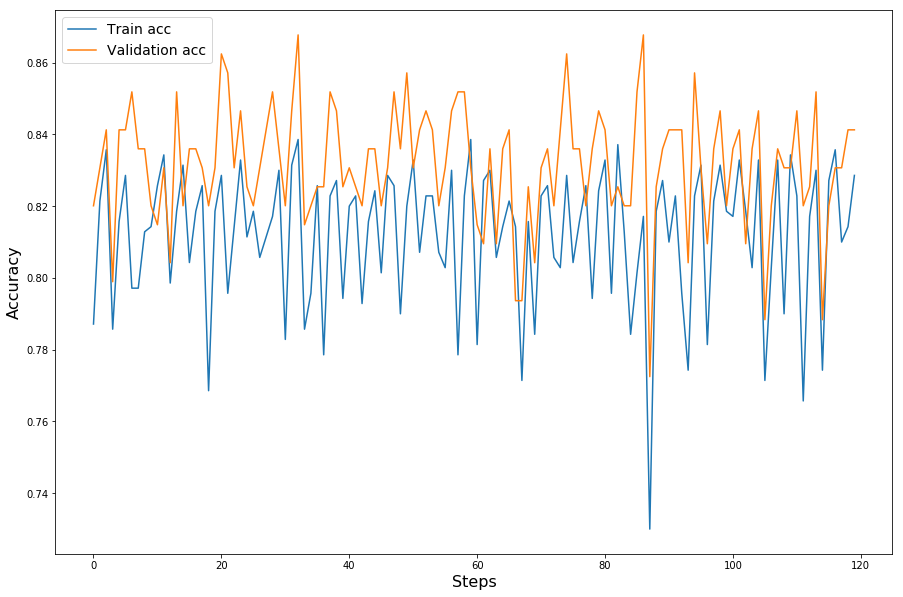

In [135]:
plt.figure(figsize=(15, 10))
plt.plot(train_acc)
plt.plot(valid_acc)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Steps', fontsize=16)
plt.legend(['Train acc', 'Validation acc'], fontsize=14, loc='upper left')
plt.show()

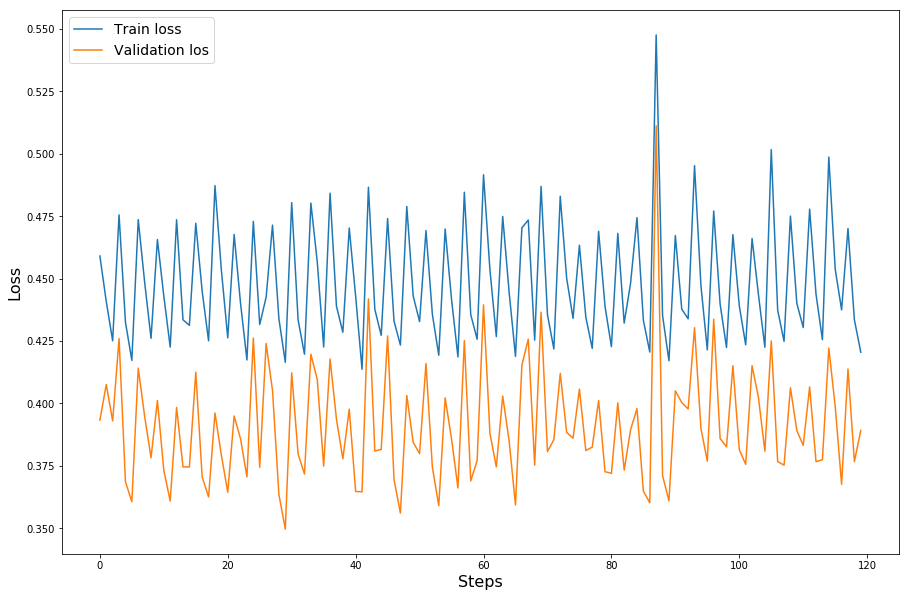

In [136]:
plt.figure(figsize=(15, 10))
plt.plot(train_loss)
plt.plot(valid_loss)
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Steps', fontsize=16)
plt.legend(['Train loss', 'Validation los'], fontsize=14, loc='upper left')
plt.show()

In [79]:
# create kaggle submission file
# in predict mode model returns generator
predict_generator = dnn_classifier.predict(input_fn=predict_input_fn)

# create list of dict like {class:class, probability:probability}
predict_dictlist = [next(predict_generator) for i in range(len(test_examples))]

# for kaggle we need only classes
classes = [predict_dictlist[item]['classes'] for item in range(len(predict_dictlist))]

# function to create pandas df
def create_mnist_submission_df(class_predictions, file_name):
    submission_df = pd.DataFrame()
    submission_df['PassengerId'] = pd.read_csv('test.csv')['PassengerId']
    submission_df['Survived'] = class_predictions
    submission_df.set_index('PassengerId', inplace=True)
    submission_df.to_csv(file_name)
    print('Saved predictions to ', file_name)

create_mnist_submission_df(classes, 'submission_titanic.csv')

Saved predictions to  submission_titanic.csv
